In [1]:
library("Mapper")
library("igraph")
library("RcppCNPy")
library("pals")
library("stringr")
library("grid")
library("matlab")
require("plotrix") 
source("functions-R.R") #Functions
library("lattice")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union



Attaching package: ‘matlab’


The following object is masked from ‘package:stats’:

    reshape


The following objects are masked from ‘package:utils’:

    find, fix


The following object is masked from ‘package:base’:

    sum


Loading required package: plotrix



### Filters

In [44]:
filters=Sys.glob('../../../../Documentos/Mapper/Data/filts/*')
filters[1:10]
length(filters)

[1] "../../../../Documentos/Mapper/Data/filts/000_l1-thres_iso-10.npy"
 [2] "../../../../Documentos/Mapper/Data/filts/000_l1-thres_iso-20.npy"
 [3] "../../../../Documentos/Mapper/Data/filts/000_l1-thres_iso-30.npy"
 [4] "../../../../Documentos/Mapper/Data/filts/001_l1-thres_iso-10.npy"
 [5] "../../../../Documentos/Mapper/Data/filts/001_l1-thres_iso-20.npy"
 [6] "../../../../Documentos/Mapper/Data/filts/001_l1-thres_iso-30.npy"
 [7] "../../../../Documentos/Mapper/Data/filts/002_l1-thres_iso-10.npy"
 [8] "../../../../Documentos/Mapper/Data/filts/002_l1-thres_iso-20.npy"
 [9] "../../../../Documentos/Mapper/Data/filts/002_l1-thres_iso-30.npy"
[10] "../../../../Documentos/Mapper/Data/filts/003_l1-thres_iso-10.npy"

[1] 3000

In [5]:
my_names2(filters[[1]])

$index
[1] "000"

$metric
[1] "l1-thres"

$filter
[1] "iso-10"

$dist_file
[1] "../../../../Documentos/Mapper/Data/dists/000_l1-thres.npy"

$file
[1] "../../../../Documentos/Mapper/Data/mapper/000_l1-thres_iso-10.rds"

$title
[1] "Mapper for index =  000 , metric= l1-thres , filter = iso-10"

### Mapper graphs

In [45]:
R=length(filters)

In [46]:
#Generating all mapper graphs 
start_time <- Sys.time()
set.seed(1)
map=list()
for (file in filters[101:R]){
    mynames=my_names2(file) #Has 6 elements: part, metric, filter,
                           #dist_file, pdf and title
    # ---------- Data -------------
    filter=npyLoad(file)
    #filter <- as.matrix(read.table("../Data/mapper_iso.txt", header=F))
    time_points=nrow(filter)
    diss=npyLoad(mynames[["dist_file"]]) #Distance matrix

    # -------- generate Mapper -----------

    int=5 #Number of intervals to be considered
    ov=5 #Number of overlaps to be considered

    print(mynames$title)
    map[[file]]=list()
    i=0
    for (overlap in 5*(1:ov)+15){
        for (intervals in (1:int)+3){
            i=i+1
            cat(i,"\t")
            #------------------ Mapper -----------------
            m = MapperRef$new(dist_x=diss)$
                use_filter(filter=filter)$
                use_cover(number_intervals = intervals,percent_overlap = overlap)$
                use_clustering_algorithm(cl = "single" , 
                                 cutoff_method = "continuous" ,adjust=1,min_dist=65)$
                construct_k_skeleton(k = 1L)
            #------------------ Files --------------------
            map[[file]][[i]]=list('graph'=m$as_igraph(),'vertices'=m$vertices,
                                  'edges'=m$simplicial_complex$as_adjacency_list())
            attr(map[[file]][[i]], ".summary") = format(m$cover)
            class(map[[file]][[i]]) <- "Mapper"
        }
    } 
    file_to_save=my_names2(file)[["file"]]
    m=map[[file]]
    saveRDS(m, file = file_to_save)
    cat("\n")
    flush.console()
}
end_time <- Sys.time()

[1] "Mapper for index =  033 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  033 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  034 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  034 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  034 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  035 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  035 , metric= l1-thre

[1] "Mapper for index =  050 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  051 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  051 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  051 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  052 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  052 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  052 , metric= l1-thre

[1] "Mapper for index =  068 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  068 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  068 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  069 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  069 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  069 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  070 , metric= l1-thre

[1] "Mapper for index =  085 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  085 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  086 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  086 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  086 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  087 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  087 , metric= l1-thre

[1] "Mapper for index =  102 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  103 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  103 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  103 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  104 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  104 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  104 , metric= l1-thre

[1] "Mapper for index =  120 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  120 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  120 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  121 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  121 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  121 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  122 , metric= l1-thre

[1] "Mapper for index =  137 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  137 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  138 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  138 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  138 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  139 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  139 , metric= l1-thre

[1] "Mapper for index =  154 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  155 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  155 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  155 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  156 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  156 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  156 , metric= l1-thre

[1] "Mapper for index =  172 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  172 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  172 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  173 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  173 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  173 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  174 , metric= l1-thre

[1] "Mapper for index =  189 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  189 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  190 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  190 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  190 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  191 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  191 , metric= l1-thre

[1] "Mapper for index =  206 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  207 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  207 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  207 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  208 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  208 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  208 , metric= l1-thre

[1] "Mapper for index =  224 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  224 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  224 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  225 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  225 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  225 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  226 , metric= l1-thre

[1] "Mapper for index =  241 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  241 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  242 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  242 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  242 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  243 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  243 , metric= l1-thre

[1] "Mapper for index =  258 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  259 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  259 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  259 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  260 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  260 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  260 , metric= l1-thre

[1] "Mapper for index =  276 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  276 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  276 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  277 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  277 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  277 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  278 , metric= l1-thre

[1] "Mapper for index =  293 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  293 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  294 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  294 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  294 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  295 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  295 , metric= l1-thre

[1] "Mapper for index =  310 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  311 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  311 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  311 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  312 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	

Warning message in eattrs[[name]][index] <- value:
“número de items para para sustituir no es un múltiplo de la longitud del reemplazo”


8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  312 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  312 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  313 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  313 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  313 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  314 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	

[1] "Mapper for index =  329 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  330 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  330 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  330 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  331 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  331 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  331 , metric= l1-thre

[1] "Mapper for index =  347 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  347 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  347 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  348 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  348 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  348 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  349 , metric= l1-thre

[1] "Mapper for index =  364 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  364 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  365 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  365 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  365 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  366 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  366 , metric= l1-thre

[1] "Mapper for index =  381 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  382 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  382 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  382 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  383 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  383 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  383 , metric= l1-thre

[1] "Mapper for index =  399 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  399 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  399 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  400 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  400 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  400 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  401 , metric= l1-thre

[1] "Mapper for index =  416 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  416 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  417 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  417 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  417 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  418 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  418 , metric= l1-thre

[1] "Mapper for index =  433 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  434 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  434 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  434 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  435 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  435 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  435 , metric= l1-thre

[1] "Mapper for index =  451 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  451 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  451 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  452 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  452 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  452 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  453 , metric= l1-thre

[1] "Mapper for index =  468 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  468 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  469 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  469 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  469 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  470 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  470 , metric= l1-thre

[1] "Mapper for index =  485 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  486 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  486 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  486 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  487 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  487 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  487 , metric= l1-thre

[1] "Mapper for index =  503 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  503 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  503 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  504 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  504 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  504 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  505 , metric= l1-thre

[1] "Mapper for index =  520 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  520 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  521 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  521 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  521 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  522 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  522 , metric= l1-thre

[1] "Mapper for index =  537 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  538 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  538 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  538 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  539 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  539 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  539 , metric= l1-thre

[1] "Mapper for index =  555 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  555 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  555 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  556 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  556 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  556 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  557 , metric= l1-thre

[1] "Mapper for index =  572 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  572 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  573 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  573 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  573 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  574 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  574 , metric= l1-thre

[1] "Mapper for index =  589 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  590 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  590 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  590 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  591 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  591 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  591 , metric= l1-thre

[1] "Mapper for index =  607 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  607 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  607 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  608 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  608 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  608 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  609 , metric= l1-thre

[1] "Mapper for index =  624 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  624 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  625 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  625 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  625 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  626 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  626 , metric= l1-thre

[1] "Mapper for index =  641 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  642 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  642 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  642 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  643 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  643 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  643 , metric= l1-thre

Warning message in eattrs[[name]][index] <- value:
“número de items para para sustituir no es un múltiplo de la longitud del reemplazo”


8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  652 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  652 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  653 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  653 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  653 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  654 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	

Warning message in eattrs[[name]][index] <- value:
“número de items para para sustituir no es un múltiplo de la longitud del reemplazo”


3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  666 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  666 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  667 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  667 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  667 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  668 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	1

[1] "Mapper for index =  683 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  683 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  684 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  684 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  684 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  685 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  685 , metric= l1-thre

[1] "Mapper for index =  700 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  701 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  701 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  701 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  702 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  702 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  702 , metric= l1-thre

[1] "Mapper for index =  718 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  718 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  718 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  719 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  719 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  719 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  720 , metric= l1-thre

[1] "Mapper for index =  735 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  735 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  736 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  736 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  736 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  737 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  737 , metric= l1-thre

[1] "Mapper for index =  752 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  753 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  753 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  753 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  754 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  754 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  754 , metric= l1-thre

[1] "Mapper for index =  770 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  770 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  770 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  771 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  771 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  771 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  772 , metric= l1-thre

[1] "Mapper for index =  787 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  787 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  788 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  788 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  788 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  789 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  789 , metric= l1-thre

[1] "Mapper for index =  804 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  805 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  805 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  805 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  806 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  806 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  806 , metric= l1-thre

[1] "Mapper for index =  822 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  822 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  822 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  823 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  823 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  823 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  824 , metric= l1-thre

[1] "Mapper for index =  839 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  839 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  840 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  840 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  840 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  841 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  841 , metric= l1-thre

[1] "Mapper for index =  856 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  857 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  857 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  857 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  858 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  858 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  858 , metric= l1-thre

[1] "Mapper for index =  874 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  874 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  874 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  875 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  875 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  875 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  876 , metric= l1-thre

[1] "Mapper for index =  891 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  891 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  892 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  892 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  892 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  893 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  893 , metric= l1-thre

[1] "Mapper for index =  908 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  909 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  909 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  909 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  910 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  910 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  910 , metric= l1-thre

[1] "Mapper for index =  926 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  926 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  926 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  927 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  927 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  927 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  928 , metric= l1-thre

[1] "Mapper for index =  943 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  943 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  944 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  944 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  944 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  945 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  945 , metric= l1-thre

[1] "Mapper for index =  960 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  961 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  961 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  961 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  962 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  962 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  962 , metric= l1-thre

[1] "Mapper for index =  978 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  978 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  978 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  979 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  979 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  979 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  980 , metric= l1-thre

[1] "Mapper for index =  995 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  995 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  996 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  996 , metric= l1-thres , filter = iso-20"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  996 , metric= l1-thres , filter = iso-30"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  997 , metric= l1-thres , filter = iso-10"
1 	2 	3 	4 	5 	6 	7 	8 	9 	10 	11 	12 	13 	14 	15 	16 	17 	18 	19 	20 	21 	22 	23 	24 	25 	
[1] "Mapper for index =  997 , metric= l1-thre

In [43]:
end_time - start_time

Time difference of 5.92039 mins

### Modularity

In [2]:
mappers=Sys.glob("../../../../Documentos/Mapper/Data/mapper/*.rds")
mappers[1:10]

[1] "../../../../Documentos/Mapper/Data/mapper/000_l1-thres_iso-10.rds"
 [2] "../../../../Documentos/Mapper/Data/mapper/000_l1-thres_iso-20.rds"
 [3] "../../../../Documentos/Mapper/Data/mapper/000_l1-thres_iso-30.rds"
 [4] "../../../../Documentos/Mapper/Data/mapper/001_l1-thres_iso-10.rds"
 [5] "../../../../Documentos/Mapper/Data/mapper/001_l1-thres_iso-20.rds"
 [6] "../../../../Documentos/Mapper/Data/mapper/001_l1-thres_iso-30.rds"
 [7] "../../../../Documentos/Mapper/Data/mapper/002_l1-thres_iso-10.rds"
 [8] "../../../../Documentos/Mapper/Data/mapper/002_l1-thres_iso-20.rds"
 [9] "../../../../Documentos/Mapper/Data/mapper/002_l1-thres_iso-30.rds"
[10] "../../../../Documentos/Mapper/Data/mapper/003_l1-thres_iso-10.rds"

In [3]:
Modul=list()
for (j in 1:length(mappers)){
    print(j)
    for (file in mappers[[j]]){
        m = readRDS(file) 
        for (i in 1:length(m)){
             graph=m[[i]]$graph
             communities=cluster_walktrap(graph)
             modul=modularity(communities)  
             Modul=append(Modul,modul)
        }
    }
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10
[1] 11
[1] 12
[1] 13
[1] 14
[1] 15
[1] 16
[1] 17
[1] 18
[1] 19
[1] 20
[1] 21
[1] 22
[1] 23
[1] 24
[1] 25
[1] 26
[1] 27
[1] 28
[1] 29
[1] 30
[1] 31
[1] 32
[1] 33
[1] 34
[1] 35
[1] 36
[1] 37
[1] 38
[1] 39
[1] 40
[1] 41
[1] 42
[1] 43
[1] 44
[1] 45
[1] 46
[1] 47
[1] 48
[1] 49
[1] 50
[1] 51
[1] 52
[1] 53
[1] 54
[1] 55
[1] 56
[1] 57
[1] 58
[1] 59
[1] 60
[1] 61
[1] 62
[1] 63
[1] 64
[1] 65
[1] 66
[1] 67
[1] 68
[1] 69
[1] 70
[1] 71
[1] 72
[1] 73
[1] 74
[1] 75
[1] 76
[1] 77
[1] 78
[1] 79
[1] 80
[1] 81
[1] 82
[1] 83
[1] 84
[1] 85
[1] 86
[1] 87
[1] 88
[1] 89
[1] 90
[1] 91
[1] 92
[1] 93
[1] 94
[1] 95
[1] 96
[1] 97
[1] 98
[1] 99
[1] 100
[1] 101
[1] 102
[1] 103
[1] 104
[1] 105
[1] 106
[1] 107
[1] 108
[1] 109
[1] 110
[1] 111
[1] 112
[1] 113
[1] 114
[1] 115
[1] 116
[1] 117
[1] 118
[1] 119
[1] 120
[1] 121
[1] 122
[1] 123
[1] 124
[1] 125
[1] 126
[1] 127
[1] 128
[1] 129
[1] 130
[1] 131
[1] 132
[1] 133
[1] 134
[1] 135
[1] 136
[1] 137
[1] 138
[1] 

In [4]:
length(Modul)

[1] 75000

In [6]:
#saveRDS(Modul, file = "../Data/modularity_boot.rData")

In [3]:
Modul = readRDS(file = "../Data/modularity_boot.rData") 

In [11]:
Modul[100:200]>0.72

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
 [97] FALSE FALSE FALSE FALSE FALSE

In [5]:
#Probability of random modularity being higher than main graph
p = sum(Modul>0.72)/length(Modul)
p

[1] 0

In [45]:
length(m)

[1] 25

In [5]:
Modul[3]
Modul[6]
Modul[9]

[[1]]
[1] 0.3912

[[1]]
[1] 0.3194444

[[1]]
[1] 0.4895833

In [60]:
25*(3-1) + 5

[1] 55

In [59]:
length(M)

[1] 25

In [41]:
M = readRDS(mappers[[3]])
m = M[[5]]


In [43]:
x = c(1,0)
y = c(0,1)

my_layout=layout_with_kk(m$graph)

In [54]:
colors2=list(hcl.colors(176, palette = "PurpOr")[rev(1:176)]) #color for time

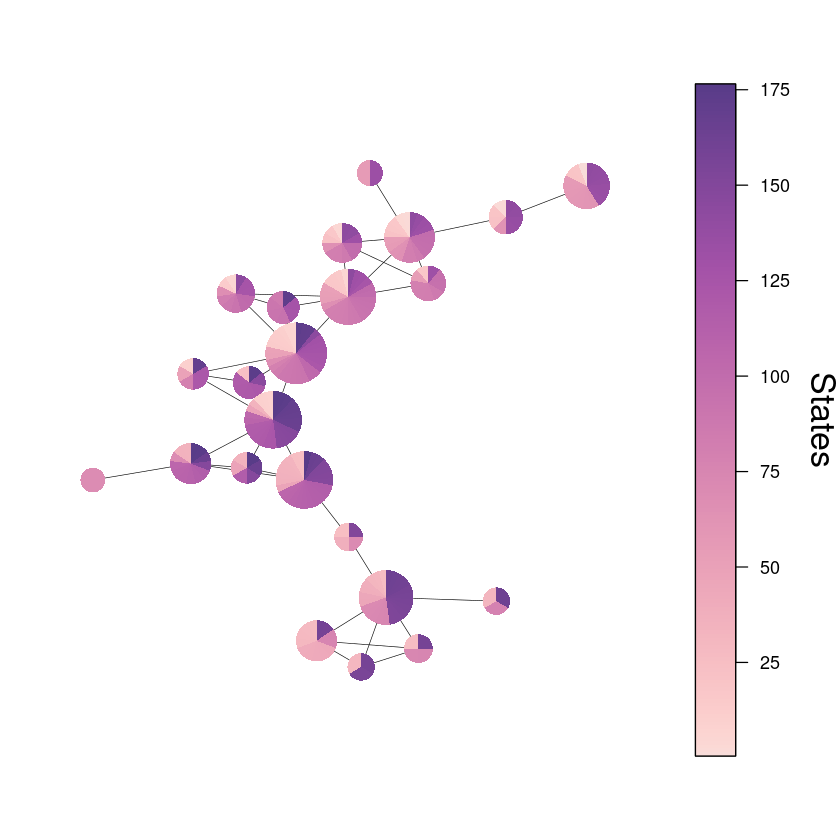

In [57]:
time_points=176
my_make_pie1=make_pie_fun(id,m$vertices,time_points)
labels=lapply(1:length(m$vertices),toString)
params = list()
params[['graph']] = m$graph
params[['layout']] = my_layout
params[['pies']] = my_make_pie1(m$vertices)
params[['size']] = vertex_size(m$vertices)
params[['colors']] = colors2
params[['margin']] =c(.2,0,.2,.2)
params[['pin']]=c(5,5)
params[['labels']]=NA
fmax=time_points
fmin=1
col=na.omit(unlist(colors2))

ticks=25*(1:7)

labels=sapply(ticks,as.character)
axis.args=list(at=ticks,labels=labels,cex.axis=0.9)
layout(matrix(c(1,2),1,2),widths=c(5.5,1.3))
do.call(plot_mapper_pie,params)

color_bar(zlim=c(fmin,fmax),axis.args=axis.args,width=.25,heigth=.8,col=col,title=NULL,
                title.side=NULL,title.line=NULL,horizontal=FALSE)

corners = par("usr") #Gets the four corners of plot area (x1, x2, y1, y2)
par(xpd = TRUE) #Draw outside plot area
text(x = corners[2]+2.2, y = mean(corners[3:4]),cex=1.7, "States", srt = 270)
#dev.off()

In [80]:
gr=list()
k= 0
for (i in c(3,6,9)){
    k = k+1
    print(i)
    M = readRDS(mappers[[i]])
    m = M[[5]]
    
    my_layout=layout_with_kk(m$graph)
    
    time_points=176 
   
    time_points=176
    my_make_pie1=make_pie_fun(id,m$vertices,time_points)
    labels=lapply(1:length(m$vertices),toString)
    params = list()
    params[['graph']] = m$graph
    params[['layout']] = my_layout
    params[['pies']] = my_make_pie1(m$vertices)
    params[['size']] = vertex_size(m$vertices)
    params[['colors']] = colors2
    params[['margin']] =c(.2,0,.2,.2)
    params[['pin']]=c(5,5)
    params[['labels']]=NA
    mod = round(Modul[25*(i-1) + 5][[1]],2)
    params[['title']] = paste('Modularity = ', mod)
    gr[[k]] =params 
}

[1] 3
[1] 6
[1] 9


In [79]:
Modul[25*(i-1) + 5][[1]] 

[1] 0.5124178

In [71]:
length(gr)

[1] 3

In [86]:
# Plot
#pdf('../Imagenes/mapper_graphs/random_mappers.pdf', width=2*3+1,height=1.51*2+3)
png('../Imagenes/mapper_graphs/random_mappers.png', width = 1400, height = 600, units = "px")
total=length(gr)
layout=make_layout(total=3,cols=3,intercalado=FALSE)
#--------------------- Plotting -------------------------------------
title_bars=list(NULL)
ticks=list(25*(1:7))
labels=sapply(ticks,as.character)
axis.args=list(at=ticks,labels=labels,cex.axis=2.2)
mins=list(1)
maxs=list(176)
multiplot(plot_mapper_pie,gr,layout=layout, title = NULL)
dev.off()

png 
  2